In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor  


## Data Description and preprocessing

In [2]:

pd_data = pd.read_csv('Daily_Demand_Forecasting_Orders.csv')

In [3]:

pd_data.shape

(60, 4)

In [4]:
pd_data.head(10)

,Week of the month (first week,second,third,fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...,NaN,NaN,NaN
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...,NaN,NaN,NaN
2,1;6;43.651;84.375;21.826;25.125;82.461;1.386;1...,NaN,NaN,NaN
3,2;2;171.297;127.667;41.542;113.294;162.284;18....,NaN,NaN,NaN
4,2;3;90.532;113.526;37.679;56.618;116.220;6.459...,NaN,NaN,NaN
5,2;4;110.925;96.360;30.792;50.704;125.868;79;52...,NaN,NaN,NaN
6,2;5;144.124;118.919;43.304;66.371;153.368;0;46...,NaN,NaN,NaN
7,2;6;119.379;113.870;38.584;85.961;124.413;15.7...,NaN,NaN,NaN
8,3;2;218.856;124.381;33.973;148.274;162.044;1.0...,NaN,NaN,NaN
9,3;3;146.518;101.045;36.399;43.306;168.723;865;...,NaN,NaN,NaN


In [5]:
pd_data.columns

Index(['Week of the month (first week', ' second', ' third',
       ' fourth or fifth week;Day of the week (Monday to Friday);Non-urgent order;Urgent order;Order type A;Order type B;Order type C;Fiscal sector orders;Orders from the traffic controller sector;Banking orders (1);Banking orders (2);Banking orders (3);Target (Total orders)'],
      dtype='object')

In [6]:
cols = [1,2,3]
pd_data.drop(pd_data.columns[cols],axis=1,inplace=True)

In [7]:
pd_data.head(2)

,Week of the month (first week
0,1;4;316.307;223.270;61.543;175.586;302.448;0;6...
1,1;5;128.633;96.042;38.058;56.037;130.580;0;404...


In [8]:
pd_data[['week of the month','day of the week','non-urgent order','urgent order','order type A','order type B','order type C','fiscal sector orders','orders from traffic controller sector','banking orders 1','banking orders 2','banking orders 3','Target(total orders)']] = pd_data['Week of the month (first week'].str.split(";",expand=True,)
pd_data.drop(pd_data.columns[0],axis=1,inplace=True)

In [9]:
pd_data.head(10)


,week of the month,day of the week,non-urgent order,urgent order,order type A,order type B,order type C,fiscal sector orders,orders from traffic controller sector,banking orders 1,banking orders 2,banking orders 3,Target(total orders)
0,1,4,316.307,223.270,61.543,175.586,302.448,0,65556,44914,188411,14793,539.577
1,1,5,128.633,96.042,38.058,56.037,130.580,0,40419,21399,89461,7679,224.675
2,1,6,43.651,84.375,21.826,25.125,82.461,1.386,11992,3452,21305,14947,129.412
3,2,2,171.297,127.667,41.542,113.294,162.284,18.156,49971,33703,69054,18423,317.120
4,2,3,90.532,113.526,37.679,56.618,116.220,6.459,48534,19646,16411,20257,210.517
5,2,4,110.925,96.360,30.792,50.704,125.868,79,52042,8773,47522,24966,207.364
6,2,5,144.124,118.919,43.304,66.371,153.368,0,46573,33597,48269,20973,263.043
7,2,6,119.379,113.870,38.584,85.961,124.413,15.709,35033,26278,56665,18502,248.958
8,3,2,218.856,124.381,33.973,148.274,162.044,1.054,66612,19461,103376,10458,344.291
9,3,3,146.518,101.045,36.399,43.306,168.723,865,58224,7742,82395,11948,248.428


In [10]:
pd_data.info() # seems like there are no missing values but the attributes are object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   week of the month                      60 non-null     object
 1   day of the week                        60 non-null     object
 2   non-urgent order                       60 non-null     object
 3   urgent order                           60 non-null     object
 4   order type A                           60 non-null     object
 5   order type B                           60 non-null     object
 6   order type C                           60 non-null     object
 7   fiscal sector orders                   60 non-null     object
 8   orders from traffic controller sector  60 non-null     object
 9   banking orders 1                       60 non-null     object
 10  banking orders 2                       60 non-null     object
 11  banking orders 3     

changing the attribute types into numeric 

In [11]:

pd_data['week of the month']=pd.to_numeric(pd_data['week of the month'])
pd_data['day of the week']=pd.to_numeric(pd_data['day of the week'])
pd_data['non-urgent order']=pd.to_numeric(pd_data['non-urgent order'])
pd_data['urgent order']=pd.to_numeric(pd_data['urgent order'])
pd_data['order type A']=pd.to_numeric(pd_data['order type A'])
pd_data['order type B']=pd.to_numeric(pd_data['order type B'])
pd_data['order type C']=pd.to_numeric(pd_data['order type C'])
pd_data['fiscal sector orders']=pd.to_numeric(pd_data['fiscal sector orders'])
pd_data['orders from traffic controller sector']=pd.to_numeric(pd_data['orders from traffic controller sector'])
pd_data['banking orders 1']=pd.to_numeric(pd_data['banking orders 1'])
pd_data['banking orders 2']=pd.to_numeric(pd_data['banking orders 2'])
pd_data['banking orders 3']=pd.to_numeric(pd_data['banking orders 3'])
pd_data['Target(total orders)']=pd.to_numeric(pd_data['Target(total orders)'])

In [12]:
pd_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week of the month                      60 non-null     int64  
 1   day of the week                        60 non-null     int64  
 2   non-urgent order                       60 non-null     float64
 3   urgent order                           60 non-null     float64
 4   order type A                           60 non-null     float64
 5   order type B                           60 non-null     float64
 6   order type C                           60 non-null     float64
 7   fiscal sector orders                   60 non-null     float64
 8   orders from traffic controller sector  60 non-null     int64  
 9   banking orders 1                       60 non-null     int64  
 10  banking orders 2                       60 non-null     int64  
 11  banking 

In [21]:
pd_data.shape[0]

60

In [22]:
pd_data.shape[1]

13

## visualizing the unique values in attributes

array([[<AxesSubplot:title={'center':'week of the month'}>,
        <AxesSubplot:title={'center':'day of the week'}>,
        <AxesSubplot:title={'center':'non-urgent order'}>,
        <AxesSubplot:title={'center':'urgent order'}>],
       [<AxesSubplot:title={'center':'order type A'}>,
        <AxesSubplot:title={'center':'order type B'}>,
        <AxesSubplot:title={'center':'order type C'}>,
        <AxesSubplot:title={'center':'fiscal sector orders'}>],
       [<AxesSubplot:title={'center':'orders from traffic controller sector'}>,
        <AxesSubplot:title={'center':'banking orders 1'}>,
        <AxesSubplot:title={'center':'banking orders 2'}>,
        <AxesSubplot:title={'center':'banking orders 3'}>],
       [<AxesSubplot:title={'center':'Target(total orders)'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

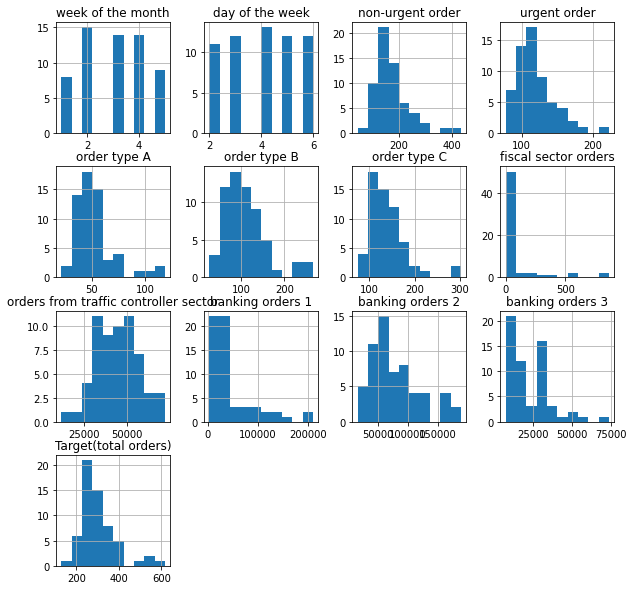

In [13]:
pd_data.hist(figsize=(10,10)) 

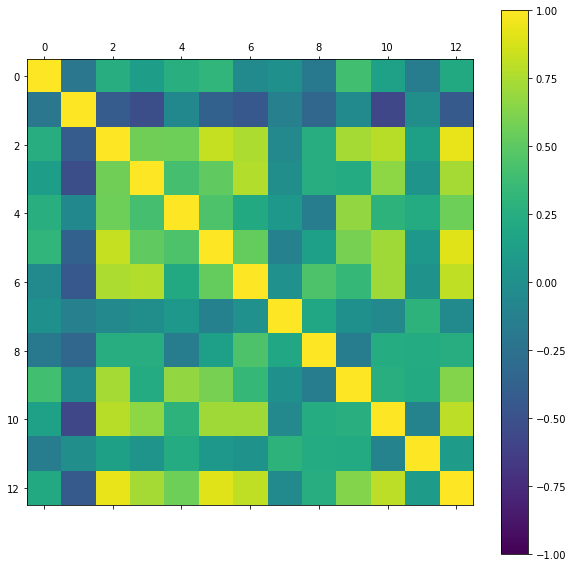

In [14]:
correlations = pd_data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

## Visualizing heatmap

In [23]:
import seaborn as sns

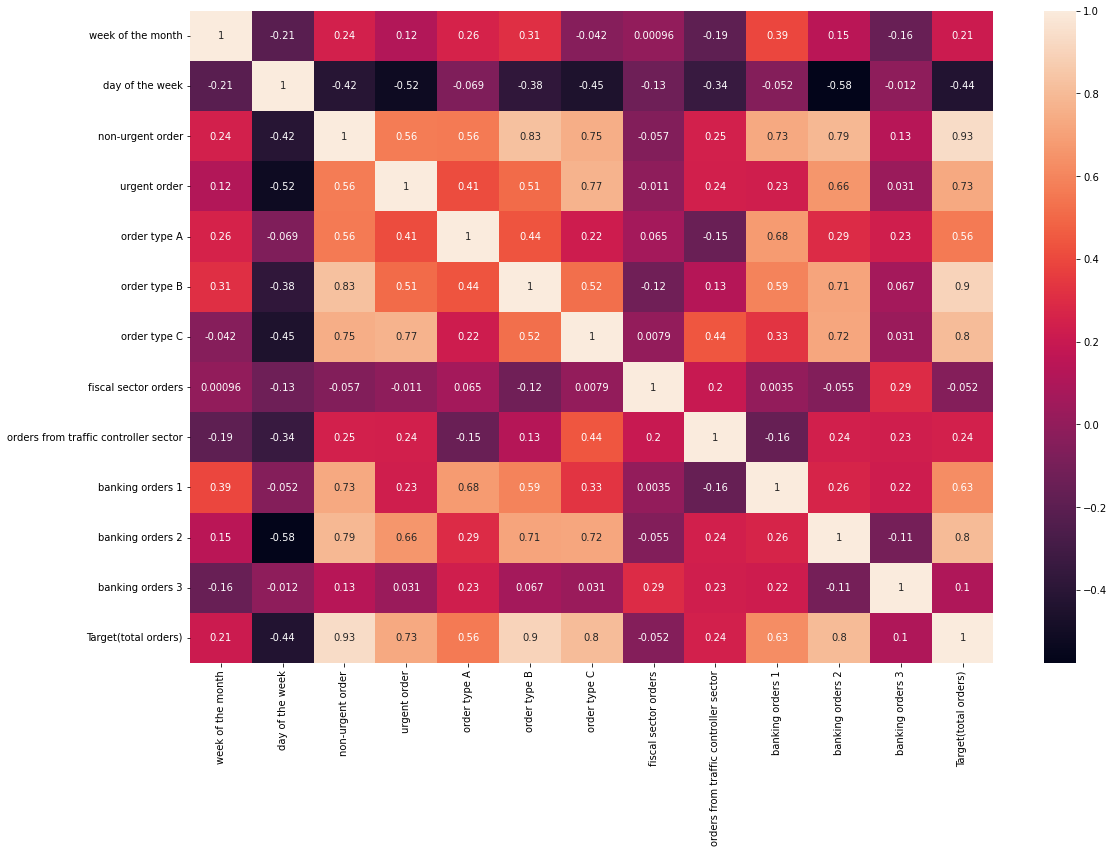

In [25]:
plt.figure(figsize=(18,12))
sns.heatmap(pd_data.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

## Splitting into train and test

In [15]:
pd_data_X = pd_data[pd_data.columns[0:-2]]
pd_data_Y = pd_data[pd_data.columns[-1]]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(pd_data_X, pd_data_Y,
                                                    train_size=0.85, test_size=0.15, random_state=42)

In [18]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

X_test_s = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)

## TPOT

In [19]:
import timeit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from tpot import TPOTRegressor

In [20]:

from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:

tpot_config = {
    'sklearn.ensemble.RandomForestRegressor': {
        'max_depth': np.arange(1,250), 
        'n_estimators': np.arange(1,250), 
        'criterion': ['mae','mse'], 
        'max_features' : ["sqrt","log2"]
        
    },

    'sklearn.neighbors.KNeighborsRegressor': {
        'n_neighbors':np.arange(1,50), 
        'weights' : ['uniform', 'distance'], 
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size': np.arange(1,50),
        'metric' : ['euclidean', 'manhattan', 'minkowski']
    },

    'sklearn.svm.SVR': {
        'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
        'C': [0.00001,0.0001,0.001,0.01,0.1,1], 
        'gamma': ['scale','auto']
    }
}


# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                    random_state=55, 
                    scoring='neg_mean_squared_error',
                    periodic_checkpoint_folder="intermediate_results",
                    n_jobs=-1, 
                    warm_start = True,
                    generations=100, 
                    population_size=100,
                    early_stop=5,
                    config_dict=tpot_config)
times = []
scores = []
winning_pipes = []

# run 2 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train_s, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test_s, y_test))
    tpot.export('tpot_ames.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

3 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 45x11 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 45x11 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 45x11 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 45x11 matrix..

Generation 1 - Current Pareto front scores:

-1	-119.95008536786199	SVR(input_matrix, SVR__C=1, SVR__gamma=scale, SVR__kernel=linear)

-2	-66.72158789884081	SVR(SVR(input_matrix, SVR__C=0.1, SVR__gamma=auto, SVR__kernel=linear), SVR__C=1, SVR__gamma=scale, SVR__kernel=linear)
Saving periodic pipeline from pareto front to intermediate_results\pipeline_gen_1_idx_0_2021.12.12_22-49-06.py
Saving periodic pipeline from pareto front to intermediate_results\pipeline_gen_1_idx_1_2021.12